# TD  1 : Régression logistique

## Partie 1 : La fonction sigmoide

### Q1 : Ecrire et tracer la fonction sigmoide $\sigma(x)=e^{x}/(1+e^{x})$ entre -10 et 10

In [1]:
sigmoid <- function(x) {
  return (exp(x)/(1+exp(x)))
}

In [2]:
sigmoid(0.5)

[1] 0.6224593

La fonction "lapply"

In [3]:
lapply(c(-10:10),sigmoid)

[[1]]
[1] 4.539787e-05

[[2]]
[1] 0.0001233946

[[3]]
[1] 0.0003353501

[[4]]
[1] 0.0009110512

[[5]]
[1] 0.002472623

[[6]]
[1] 0.006692851

[[7]]
[1] 0.01798621

[[8]]
[1] 0.04742587

[[9]]
[1] 0.1192029

[[10]]
[1] 0.2689414

[[11]]
[1] 0.5

[[12]]
[1] 0.7310586

[[13]]
[1] 0.8807971

[[14]]
[1] 0.9525741

[[15]]
[1] 0.9820138

[[16]]
[1] 0.9933071

[[17]]
[1] 0.9975274

[[18]]
[1] 0.9990889

[[19]]
[1] 0.9996646

[[20]]
[1] 0.9998766

[[21]]
[1] 0.9999546

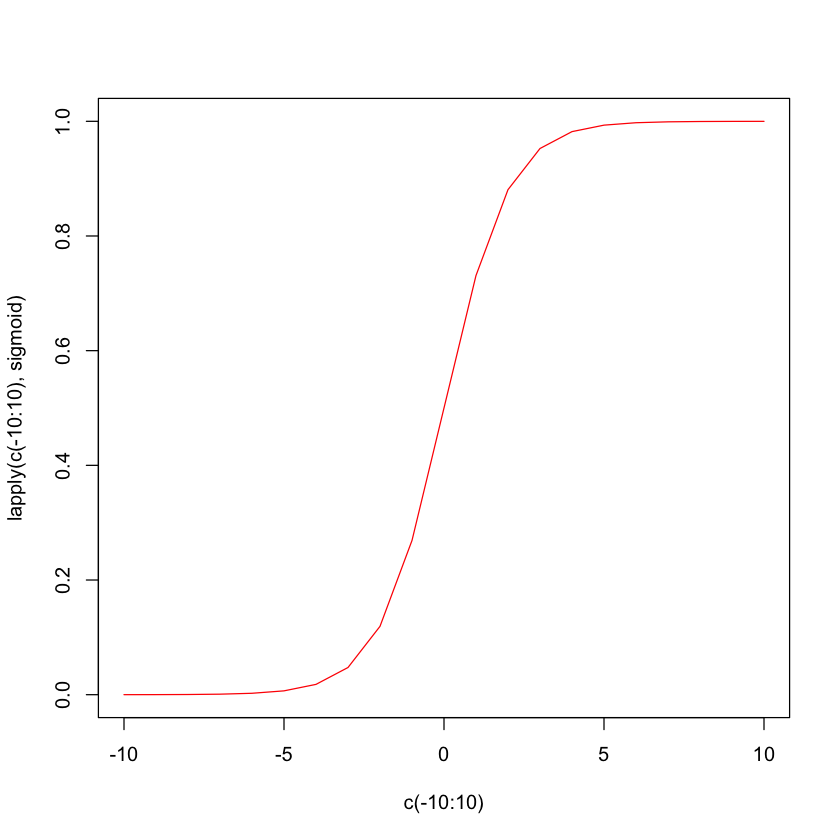

In [4]:
plot(x = c(-10:10),y = lapply(c(-10:10),sigmoid),col='red',type='l')

### Données

On va travailler sur des données artificielles. 

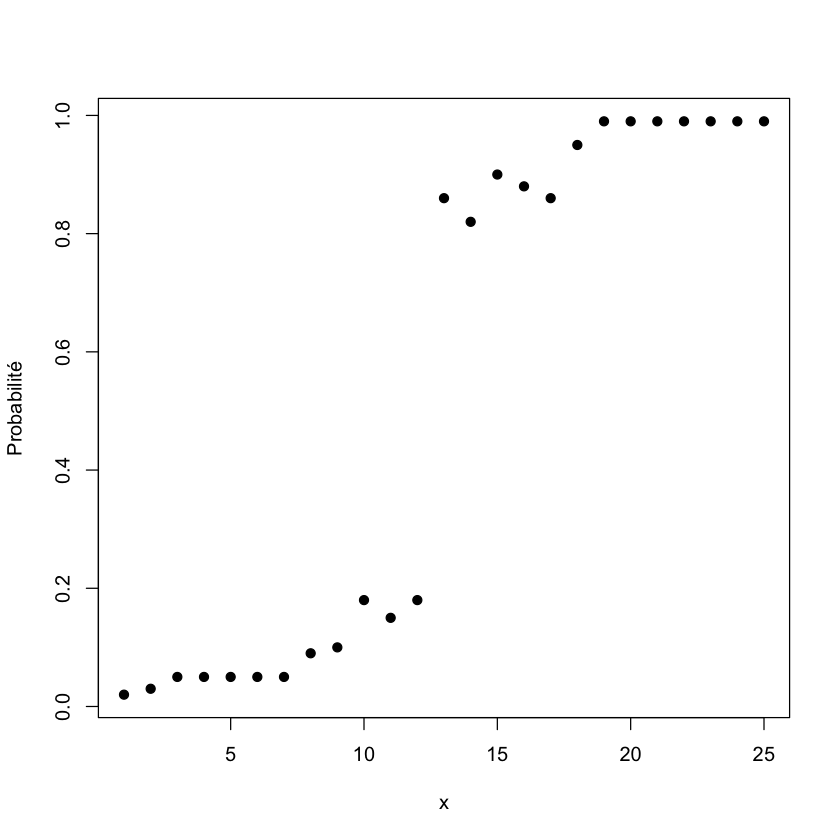

In [5]:
probas <- c(0.02, 0.03, 0.05, 0.05, 0.05, 0.05, 0.05, 0.09, 0.1, 0.18, 0.15, 0.18, 0.86, 0.82, 0.9, 0.88, 0.86, 0.95, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99)
x <- c(1:length(probas))
plot(x, probas, pch=19, cex=1, col='black', xlab = 'x', ylab = 'Probabilité')

Elles peuvent représenter la probabilité d'un évènement en fonction du nombre de tirages de cet évènement. (ex : gagner au loto , avoir un cancer en fonction du nombre de cigarettes...). 

L'objectif va être de modéliser ces probabilités en fonction du nombre de tirage. On va donc essayer de trouver une fonction $f$ telle que $\hat{p}(x)=f(x)$ approche au mieux les probabilités $p(x)$

### Q2 : Faire une regression linéaire pour approcher au mieux les probabilités. Illustrer et commenter.

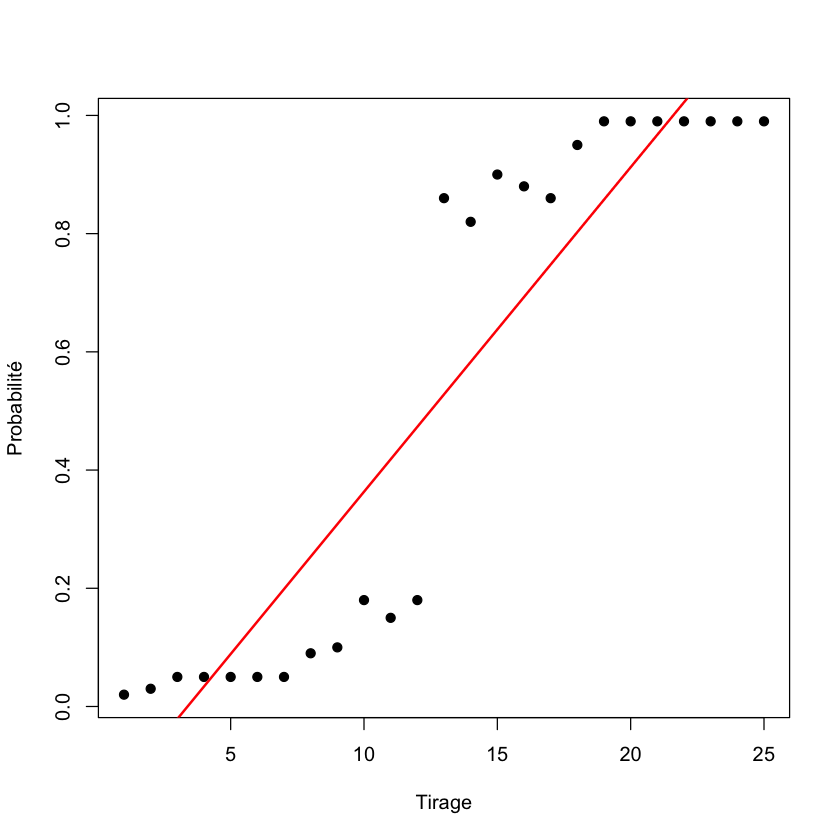

In [6]:
lin=lm(probas ~ x)
plot(x,probas,pch=19,cex=1,col='black',xlab = 'Tirage',ylab = 'Probabilité')
abline(lin,lwd=2,col='red')

In [7]:
summary(lin)


Call:
lm(formula = probas ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.29309 -0.14855  0.01617  0.13255  0.33200 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.185800   0.073429   -2.53   0.0187 *  
x            0.054908   0.004939   11.12    1e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1781 on 23 degrees of freedom
Multiple R-squared:  0.8431,	Adjusted R-squared:  0.8363 
F-statistic: 123.6 on 1 and 23 DF,  p-value: 1.001e-10


### Q3 : Essayer d'approcher les probabilités par $\sigma(\beta_{1}x+\beta_{0})$

Vous utiliserez la fonction "lines" et "lapply" de R:

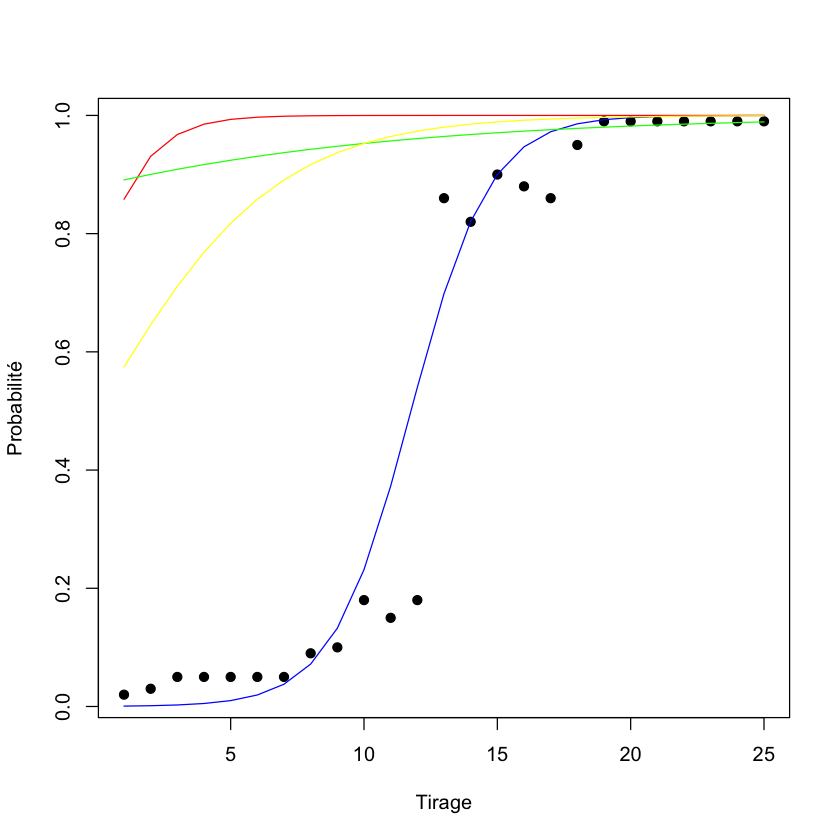

In [9]:
plot(x,probas,pch=19,cex=1,col='black',xlab = 'Tirage',ylab = 'Probabilité')
lines(unlist(lapply(0.68*x-8, sigmoid)),col='blue')
lines(unlist(lapply(0.8*x+1, sigmoid)),col='red')
lines(unlist(lapply(0.1*x+2, sigmoid)),col='green')
lines(unlist(lapply(0.3*x, sigmoid)),col='yellow')

Afficher plusieurs courbes avec différents paramètre de $\beta_{1},\beta_{0}$

### Q4 : Quel modèle avons-nous écrit ?

## Partie 2 : La regression logistique

La regression logistique utilise la fonction sigmoide. Au lieu de modéliser une probabilité brute $p(x)$, la regression logistique est utilisée en classification pour modéliser la probabilité d'appartenir à une classe. On note cette probabilité $p(C|x)$.

Le modèle de regression logistique va modéliser $p(C|x)$ comme $\hat{p}(C|x)=\sigma(\beta_{0}+\beta_{1}x_{1}+...+\beta_{p}x_{p})$ et va déterminer $\beta_{0}$, $\beta_{1}$,...,$\beta_{p}$ qui vont le plus "coller" aux données.

### Q4 : Question sur l'équivalence des modèles.

Montrez que les formulations $\pi(x)=\frac{exp(\beta_{0}+\beta_{1}x_{1}+...+\beta_{p}x_{p})}{1+exp(\beta_{0}+\beta_{1}x_{1}+...+\beta_{p}x_{p})}$ et $\text{logit}(x)=\log(\frac{\pi(x)}{1-\pi(x)})=\beta_{0}+\beta_{1}x_{1}+...+\beta_{p}x_{p}$ sont équivalentes.

## Cas parfaitement séparable

On rajoute au cas précédent des classes (ex : on a effectivement gagné au lotto ou eu un cancer).

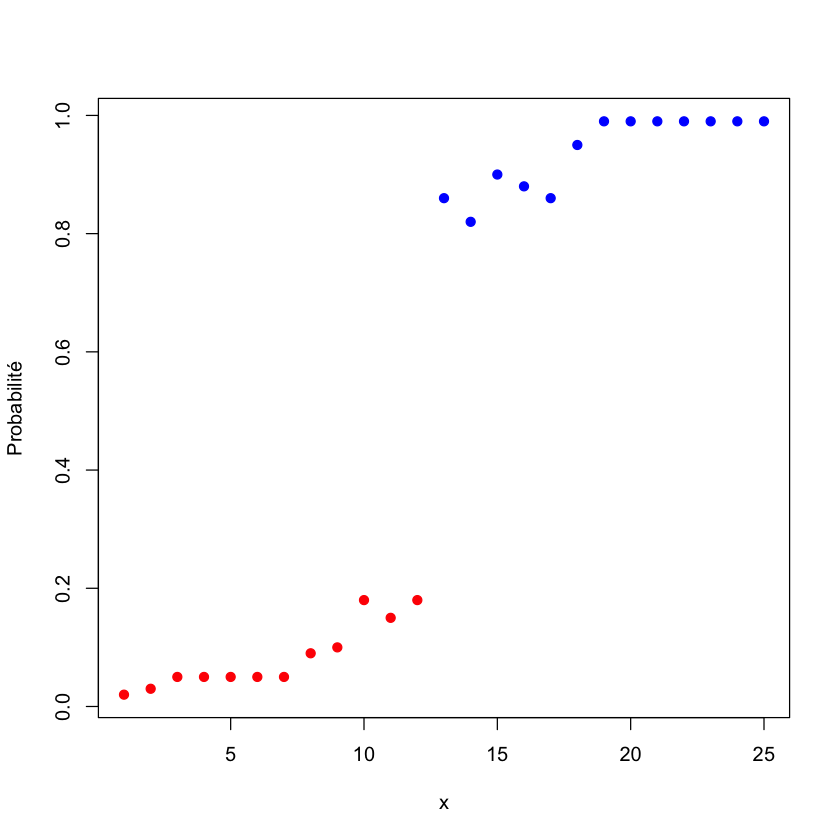

In [10]:
clr1 <- c(rgb(1,0,0,1),rgb(0,0,1,1))
probas <- c(0.02, 0.03, 0.05, 0.05, 0.05, 0.05, 0.05, 0.09, 0.1, 0.18, 0.15, 0.18, 0.86, 0.82, 0.9, 0.88, 0.86, 0.95, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99)
y <- c(0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1)
x <- c(1:length(probas))
plot(x, probas, pch=19, cex=1, col=clr1[y+1], xlab = 'x', ylab = 'Probabilité')

### Q4 : Pourquoi est-ce parfaitement séparable ?

Un frontière verticale à x=13 sépare parfaitement nos deux classes 

### Q5: Effectuer la regression logistique. Donnez les paramètres $\beta_{1}$ et $\beta_{0}$. Sont-ils valables ?

In [11]:
reg=glm(y~x,family=binomial)
summary(reg)
reg$coefficients[1]
reg$coefficients[2]

Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = y ~ x, family = binomial)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-6.154e-05  -2.100e-08   2.100e-08   2.100e-08   6.163e-05  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept)   -502.08  246427.52  -0.002    0.998
x               40.17   19697.33   0.002    0.998

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3.4617e+01  on 24  degrees of freedom
Residual deviance: 7.5854e-09  on 23  degrees of freedom
AIC: 4

Number of Fisher Scoring iterations: 25


(Intercept) 
  -502.0848

x 
40.16667

### Q6 : Plotez la sigmoide associée à notre problème. Satisfaisant ?

In [ ]:
sigmoid(predict(reg))

## Cas non parfaitement séparable


### Q7 : Changez le problème en un problème non linéairement séparable

### Q8 : Refaire la même démarche. Commentez.